In [6]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install statsmodels
!pip install matplotlib
!pip install scipy
!pip install pingouin


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pingouin as pg
import scipy





In [21]:
from scipy import stats
from scipy.stats import skewnorm 
np.random.seed(seed=1)
size = 200

# Generate data for bimodal distribution
X1 = np.random.normal(loc=40, scale=2, size=int(size/2))
X2 = np.random.normal(loc=10, scale=4, size=int(size/2))
bi_modal = np.concatenate([X1, X2])

# Generate data for multimodal distribution
X1 = np.random.normal(loc=40, scale=4, size=int(size/4))
X2 = np.random.normal(loc=10, scale=4, size=int(size/4))
X3 = np.random.normal(loc=0, scale=2, size=int(size/4))
X4 = np.random.normal(loc=80, scale=2, size=int(size/4))
multi_modal = np.concatenate([X1, X2, X3, X4])

# Create the DataFrame with different types of random variables
df = pd.DataFrame(data={
    "Normal": np.random.normal(loc=0, scale=2, size=size),
    "Positive Skewed": skewnorm.rvs(a=10, size=size),
    "Negative Skewed": skewnorm.rvs(a=-10, size=size),
    "Exponential": np.random.exponential(scale=20, size=size),
    "Uniform": np.random.uniform(low=0.0, high=1.0, size=size),
    "Bimodal": bi_modal,
    "Multimodal": multi_modal,
    "Poisson": np.random.poisson(lam=1.0, size=size),
    "Discrete": np.random.choice([10, 12, 14, 15, 16, 17, 20], size=size),
}).round(3)

df.head(3)

,Normal,Positive Skewed,Negative Skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,-2.613,0.987,-0.099,36.250,0.864,43.249,38.396,0,20
1,0.153,0.570,-2.485,16.062,0.448,38.776,43.296,1,17
2,0.734,1.093,-0.487,40.443,0.562,38.944,37.751,1,17


In [22]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
Normal,0.988676,1.138047e-01,True
Positive Skewed,0.942787,4.038199e-07,False
Negative Skewed,0.918364,4.423824e-09,False
Exponential,0.838932,1.286760e-13,False
Uniform,0.968244,1.724466e-04,False
Bimodal,0.790213,1.158750e-15,False
Multimodal,0.843654,2.137643e-13,False
Poisson,0.817142,1.403118e-14,False
Discrete,0.931505,4.455329e-08,False


In [23]:
df_pinguins=sns.load_dataset('penguins')
print(df_pinguins.shape)
df_pinguins.head(3)

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [24]:
pg.normality(data=df_pinguins, dv='bill_length_mm', group='species', alpha=0.05)

,W,pval,normal
species,,,
Adelie,0.993362,0.716661,True
Chinstrap,0.975250,0.194099,True
Gentoo,0.972722,0.013491,False


In [26]:
pg.normality(data=df_pinguins['bill_length_mm'], alpha=0.05)

,W,pval,normal
bill_length_mm,0.974855,0.000011,False


In [27]:
pg.normality(data=df_pinguins['bill_depth_mm'], alpha=0.05)

,W,pval,normal
bill_depth_mm,0.972583,0.000004,False


In [28]:
pg.normality(data=df_pinguins, dv='bill_depth_mm', group='species', alpha=0.05)

,W,pval,normal
species,,,
Adelie,0.984669,0.092500,True
Chinstrap,0.972743,0.141777,True
Gentoo,0.976094,0.027699,False


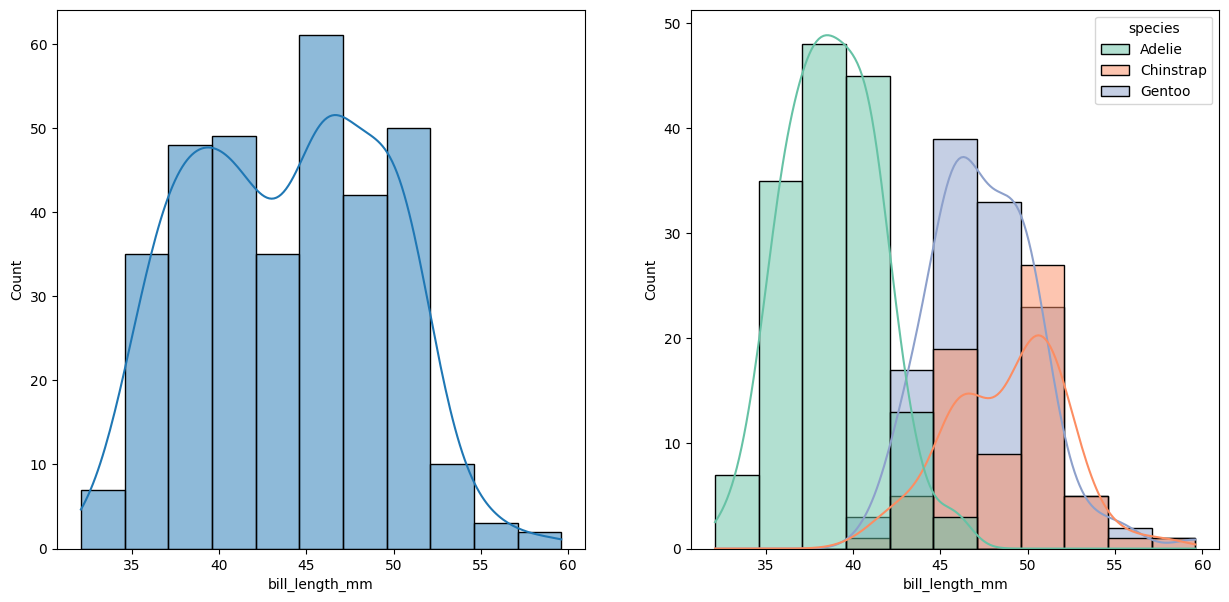

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
sns.histplot(data=df_pinguins, x='bill_length_mm', kde=True, ax=axes[0])
sns.histplot(data=df_pinguins, x='bill_length_mm', hue='species', kde=True, palette='Set2', ax=axes[1])
plt.show();


## Chi Square Test

In [32]:
df = pg.read_dataset('chi2_independence')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

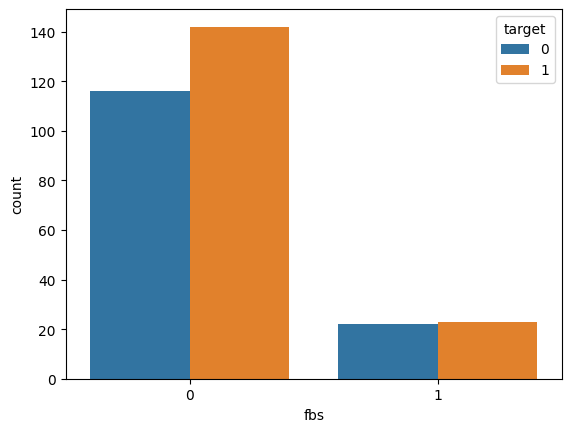

In [35]:
sns.countplot(x='fbs', hue='target', data=df)
plt.show()

In [38]:
expected, observed, stats = pg.chi2_independence(data=df, x='fbs', y='target')

In [39]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.106273,1.0,0.744428,0.018728,0.062261
1,cressie-read,0.666667,0.106201,1.0,0.744511,0.018722,0.062253
2,log-likelihood,0.000000,0.106069,1.0,0.744664,0.018710,0.062237
3,freeman-tukey,-0.500000,0.105979,1.0,0.744769,0.018702,0.062227
4,mod-log-likelihood,-1.000000,0.105897,1.0,0.744865,0.018695,0.062217
5,neyman,-2.000000,0.105755,1.0,0.745030,0.018682,0.062201


In [40]:
expected

target,0,1
fbs,,
0,117.50495,140.49505
1,20.49505,24.50495


In [41]:
observed

target,0,1
fbs,,
0,116.5,141.5
1,21.5,23.5


In [42]:
stats.query("test == 'pearson'")['pval']

0    0.744428
Name: pval, dtype: float64

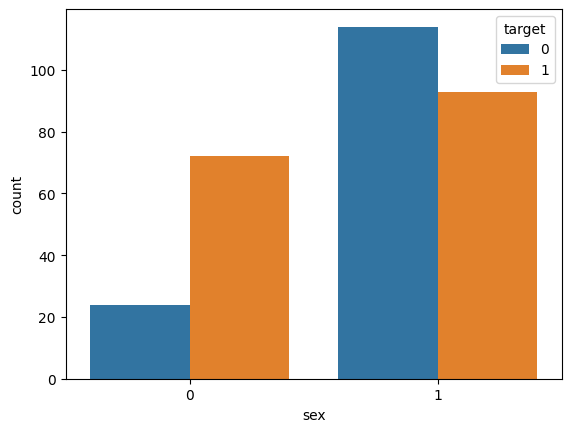

In [43]:
sns.countplot(x='sex', hue='target', data=df)
plt.show()

In [44]:
expected, observed, stats = pg.chi2_independence(data=df, x='sex', y='target')

In [47]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,22.717227,1.0,1.876778e-06,0.273814,0.997494
1,cressie-read,0.666667,22.931427,1.0,1.678845e-06,0.275102,0.997663
2,log-likelihood,0.000000,23.557374,1.0,1.212439e-06,0.278832,0.998096
3,freeman-tukey,-0.500000,24.219622,1.0,8.595211e-07,0.282724,0.998469
4,mod-log-likelihood,-1.000000,25.071078,1.0,5.525544e-07,0.287651,0.998845
5,neyman,-2.000000,27.457956,1.0,1.605471e-07,0.301032,0.999481


In [51]:
stats.query("test == 'pearson'")['pval']

0    0.000002
Name: pval, dtype: float64

### T TESTING

In [53]:
np.random.seed(123)
size = 250
df = pd.DataFrame(data={'Col1': np.random.normal(loc=7, scale=1, size=size),
                        'Col2': np.random.normal(loc=8, scale=1.2, size=size)}
                        )
df.head()                        

,Col1,Col2
0,5.914369,10.235513
1,7.997345,9.002070
2,7.282978,7.181059
3,5.493705,5.969537
4,6.421400,8.891223


In [54]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
Col1,0.997108,0.933421,True
Col2,0.997267,0.948783,True


In [55]:
pg.ttest(x=df['Col1'], y=df['Col2'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-9.619181,498,two-sided,3.327666e-20,"[-1.15, -0.76]",0.860366,1.2e+17,1.0


## There is enough statistical difference between the values of each column, we reject the Null Hypothesis that claimed there was no substantial difference.

In [56]:

pg.ttest(df['Col1'], df['Col2']).loc['T-test','p-val']

3.3276657111565147e-20

In [57]:
np.random.seed(3)
size = 250
df = pd.DataFrame(data={'Col3': np.random.normal(loc=7, scale=1, size=size),
                        'Col4': np.random.normal(loc=7.2, scale=1, size=size)}
                        )
df.head(3) 

,Col3,Col4
0,8.788628,8.919477
1,7.436510,4.840785
2,7.096497,6.628651


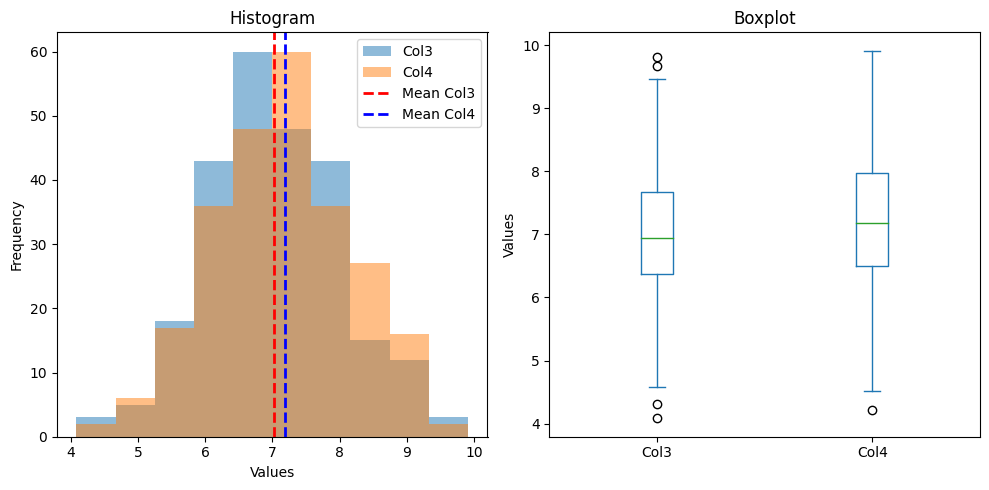

In [58]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram
df.plot.hist(ax=ax1, alpha=0.5)
ax1.axvline(df['Col3'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Col3')
ax1.axvline(df['Col4'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean Col4')
ax1.legend()
ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram')

# Plot the boxplot
df.plot.box(ax=ax2)
ax2.set_ylabel('Values')
ax2.set_title('Boxplot')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

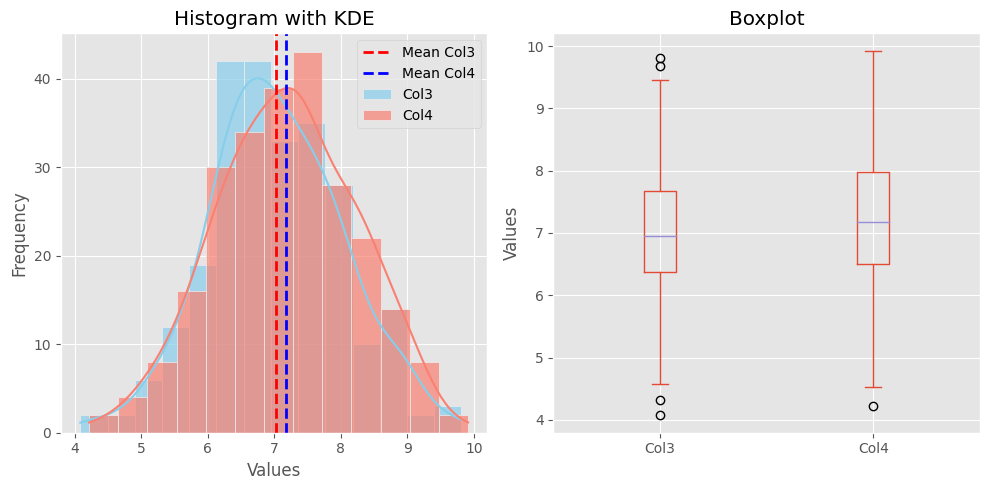

In [60]:
# Set the ggplot style
plt.style.use('ggplot')

# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histogram with KDE
sns.histplot(data=df, x='Col3', ax=ax1, kde=True, color='skyblue', alpha=0.7, label='Col3')
sns.histplot(data=df, x='Col4', ax=ax1, kde=True, color='salmon', alpha=0.7, label='Col4')
ax1.axvline(df['Col3'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Col3')
ax1.axvline(df['Col4'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean Col4')
ax1.legend()
ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram with KDE')

# Plot the boxplot
df.plot.box(ax=ax2)
ax2.set_ylabel('Values')
ax2.set_title('Boxplot')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [62]:
pg.ttest(x=df['Col3'], y=df['Col4'])


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.672958,498,two-sided,0.094964,"[-0.33, 0.03]",0.149634,0.386,0.385961


In [64]:
pg.ttest(df['Col3'], df['Col4']).loc['T-test','p-val']

0.09496367925872773

In [8]:
df = (pg.read_dataset('mixed_anova')
    .query("Group == 'Meditation' and Time != 'January'")
    .drop(['Group'], axis = 1)
    .reset_index(drop=True)
)
print(df.shape)
df.head()

(60, 3)


,Scores,Time,Subject
0,5.579842,August,30
1,5.100035,August,31
2,4.472149,August,32
3,4.915282,August,33
4,6.316594,August,34


In [11]:
df['Month'] = df['Time'].replace({"August":8, "June":6})
df.sort_values(by='Month', ascending=True, inplace=True)
df.head()

,Scores,Time,Subject,Month
59,7.822986,June,59,6
58,4.990568,June,58,6
32,5.925979,June,32,6
33,6.343304,June,33,6
34,7.757797,June,34,6


In [12]:
pg.normality(data=df, dv='Scores', group='Month', alpha=0.05)

,W,pval,normal
Month,,,
6,0.992021,0.997722,True
8,0.974791,0.676565,True


In [16]:
pg.pairwise_tests(data=df, dv='Scores', within='Month', subject='Subject')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Month,6,8,True,True,4.374791,29.0,two-sided,0.000143,187.445,1.0296


In [17]:
pg.pairwise_tests(data=df, dv='Scores', within='Month', subject='Subject', effsize='cohen').loc[0, 'p-unc']

0.0001434360522040144

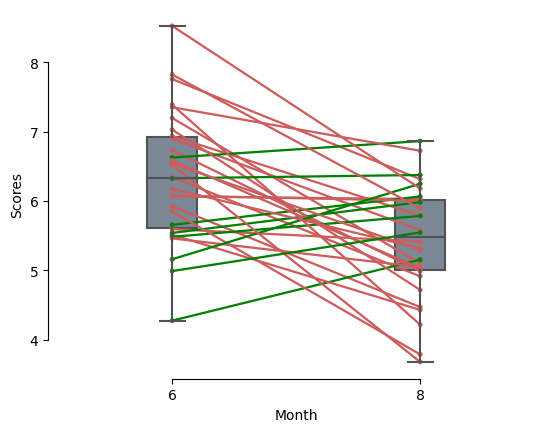

In [20]:
pg.plot_paired(data=df, dv='Scores', within='Month', subject='Subject')
plt.show()

### Analysis of Variance (ANOVA) compares the variations between 3 or more groups. 

In [22]:
df = pg.read_dataset('anova')
print(df.shape)
df.head()

(19, 3)


,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


In [23]:
pg.normality(df, dv='Pain threshold', group='Hair color', alpha=0.05)

,W,pval,normal
Hair color,,,
Light Blond,0.991032,0.983181,True
Dark Blond,0.939790,0.664457,True
Light Brunette,0.930607,0.597974,True
Dark Brunette,0.883214,0.324129,True


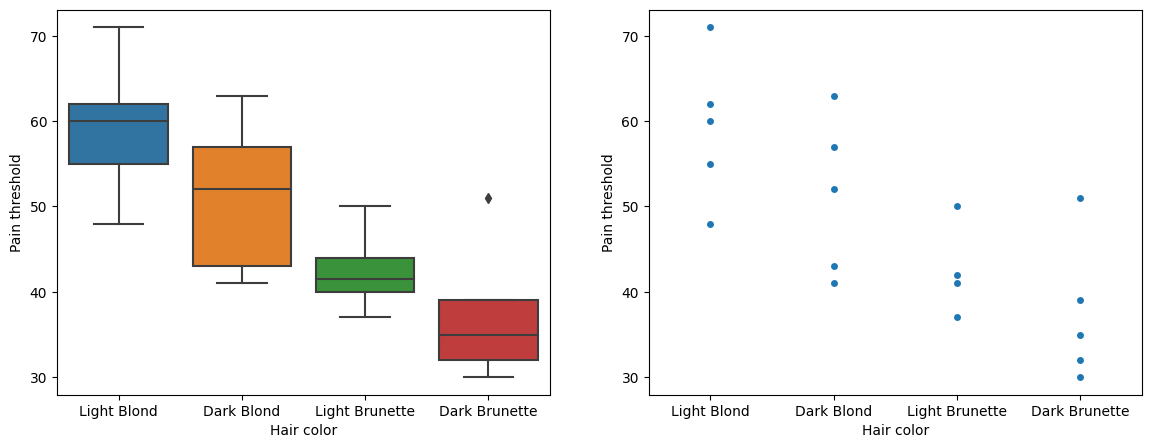

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.boxplot(data=df, x='Hair color', y='Pain threshold', ax=axes[0])
sns.swarmplot(data=df, x='Hair color', y='Pain threshold', dodge=True, ax=axes[1])
plt.show()

In [30]:
pg.anova(data=df, dv='Pain threshold', between='Hair color', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Hair color,1360.726316,3,453.575439,6.791407,0.004114,0.575962
1,Within,1001.800000,15,66.786667,NaN,NaN,NaN


### Non Parametric Statistical Test----when not normally distributed


In [12]:
np.random.seed(1)
df = pd.DataFrame(data={'Col1':np.random.uniform(low=0, high=1, size=500),
                        'Col2':np.random.uniform(low=0.1, high=1, size=500)})
df.head()                        

,Col1,Col2
0,0.417022,0.178734
1,0.720324,0.304579
2,0.000114,0.382939
3,0.302333,0.257289
4,0.146756,0.646385


In [13]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
Col1,0.947966,2.975455e-12,False
Col2,0.962374,5.253771e-10,False


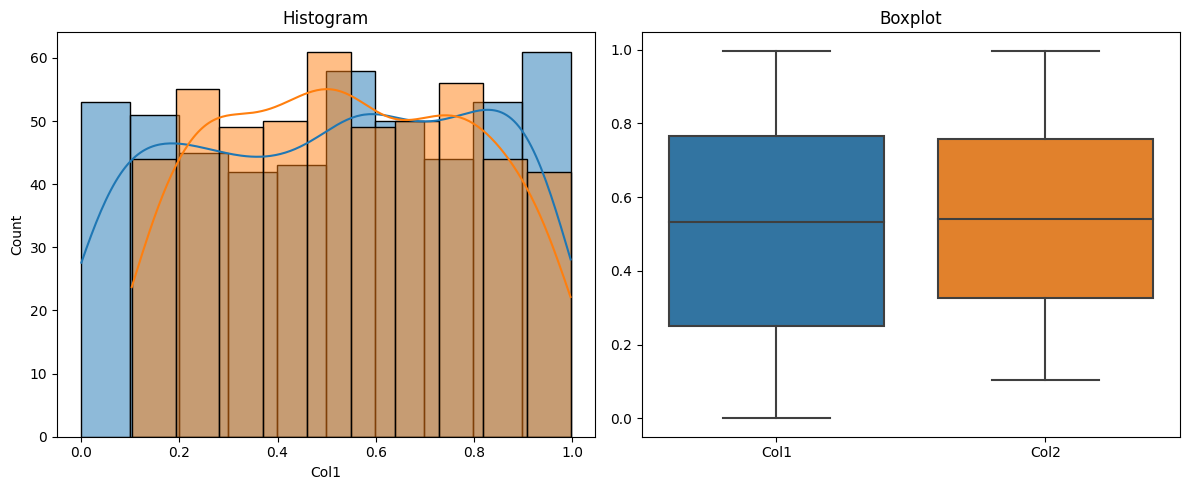

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
sns.histplot(data=df, x='Col1', ax=axes[0], kde=True)
sns.histplot(data=df, x='Col2', ax=axes[0], kde=True)
axes[0].set_title('Histogram')

# Boxplot
sns.boxplot(data=df[['Col1', 'Col2']], ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()
plt.show()

In [15]:
pg.mwu(x=df['Col1'], y=df['Col2'])

,U-val,alternative,p-val,RBC,CLES
MWU,116963.0,two-sided,0.078437,0.064296,0.467852


In [17]:
df = pd.DataFrame(data={'Col3':[18.3, 13.3, 16.5, 12.6, 9.5, 13.6, 8.1, 8.9, 10, 8.3, 7.9, 8.1, 13.4],
                        'Col4':[12.7, 11.1, 15.3, 12.7, 10.5, 15.6, 11.2, 14.2, 16.3, 15.5, 19.9, 20.4, 36.8]
                        })
df.head()          

,Col3,Col4
0,18.3,12.7
1,13.3,11.1
2,16.5,15.3
3,12.6,12.7
4,9.5,10.5


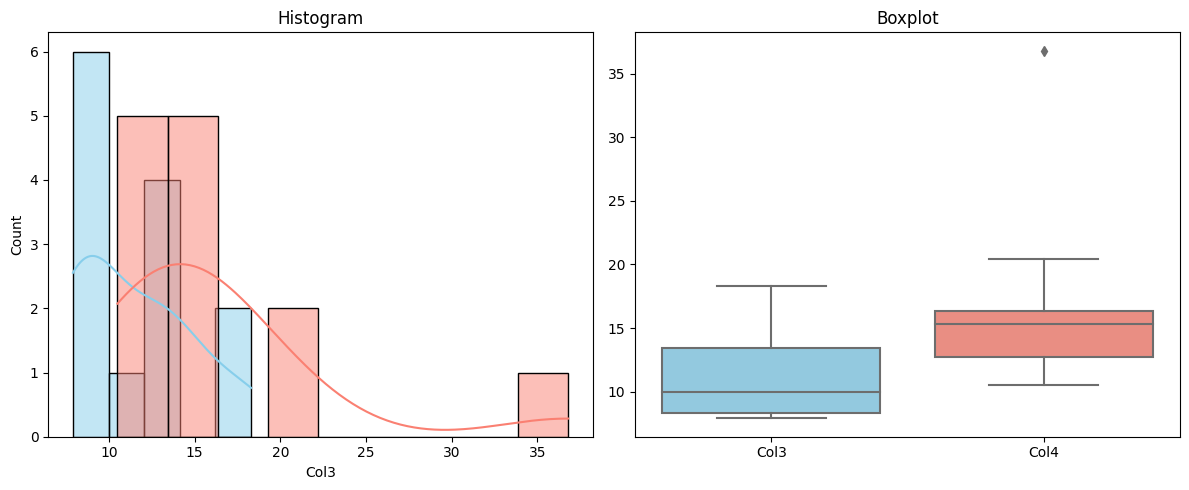

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
sns.histplot(data=df, x='Col3', ax=axes[0], kde=True, color='skyblue', edgecolor='black')
sns.histplot(data=df, x='Col4', ax=axes[0], kde=True, color='salmon', edgecolor='black')
axes[0].set_title('Histogram')

# Boxplot
sns.boxplot(data=df, ax=axes[1], palette=['skyblue', 'salmon'])
axes[1].set_title('Boxplot')

plt.tight_layout()
plt.show()

In [20]:
pg.wilcoxon(x=df['Col3'], y=df['Col4'])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,16.0,two-sided,0.039795,-0.648352,0.224852


### Kruskal-Wallis non parametric ANOVA ---- When three or more groups with at least one with a not normal distribution. 

In [ ]:
### Statistica Tests Unit 3 Non parametric. 